# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"
cities_df = pd.read_csv(output_data_file)
cities_df
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp_max = []
wind_speed = []

url = 'http://api.openweathermap.org/data/2.5/forecast?'

record_count = 1

for city in cities:
    try:
        res = requests.get(f'{url}q={city}&APPID={api_key}').json()
        city_name.append(res['city']['name'])
        cloudiness.append(res['list'][0]['clouds']['all'])
        country.append(res['city']['country'])
        date.append(res['list'][0]['dt'])
        humidity.append(res['list'][0]['main']['humidity'])
        lat.append(res['city']['coord']['lat'])
        lng.append(res['city']['coord']['lon'])
        temp_max.append(res['list'][0]['main']['temp_max'])
        wind_speed.append(res['list'][0]['wind']['speed'])
        record_count += 1
        print(f'Processing Record number {record_count} | {city}')
        print(f"{url}&q={city}")
        time.sleep(1.00)
    except:
        print(f"City not found: {city}. Skipping to next city")
    continue
output = pd.DataFrame({'City': city_name,
                            'Cloud': cloudiness,
                            'Country': country,
                            'Date': date,
                            'Humidity': humidity,
                            'Lat': lat,
                            'Lon': lng,
                            'Max Temp': temp_max,
                            'Wind Speed': wind_speed})

City not found: guerrero negro. Skipping to next city
City not found: ushuaia. Skipping to next city
City not found: albany. Skipping to next city
City not found: thompson. Skipping to next city
City not found: iqaluit. Skipping to next city
City not found: attawapiskat. Skipping to next city
City not found: kilakarai. Skipping to next city
City not found: pevek. Skipping to next city
City not found: barrow. Skipping to next city
City not found: mogochin. Skipping to next city
City not found: lorengau. Skipping to next city
City not found: cidreira. Skipping to next city
City not found: nabire. Skipping to next city
City not found: moerai. Skipping to next city
City not found: hilo. Skipping to next city
City not found: bredasdorp. Skipping to next city
City not found: taolanaro. Skipping to next city
City not found: san patricio. Skipping to next city
City not found: bluff. Skipping to next city
City not found: belushya guba. Skipping to next city
City not found: palabuhanratu. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
output.to_csv('Output.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

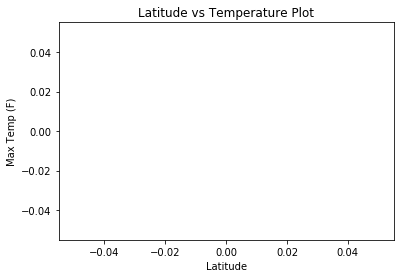

In [6]:
latitude_one = output['Lat']
temp_max_plot = output['Max Temp']

plt.scatter(latitude_one, temp_max_plot, marker="o", edgecolor="black", alpha=0.50)
plt.title('Latitude vs Temperature Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig("temp_max.png")
plt.show()

#### Latitude vs. Humidity Plot

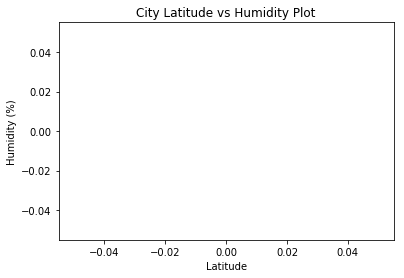

In [8]:
humidity_plot = output['Humidity']

plt.scatter(latitude_one, humidity_plot, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

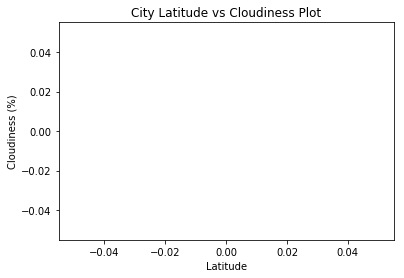

In [9]:
cloudiness_plot = output['Cloud']

plt.scatter(latitude_one, cloudiness_plot, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

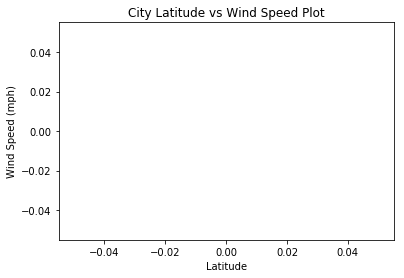

In [10]:
wind_speed_plot = output['Wind Speed']

plt.scatter(latitude_one, wind_speed_plot, marker="o", edgecolor="black", alpha=0.50)
plt.title('City Latitude vs Wind Speed Plot')
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')
plt.savefig("windspeed.png")

plt.show()